## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
X = pd.get_dummies(X, drop_first=True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [6]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_1.fit(X_test, y_test)
regr_2.fit(X_train, y_train)
regr_2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [7]:
mse1_treino = regr_1.score(X_train, y_train)
mse1_teste = regr_1.score(X_test, y_test)
mse2_treino = regr_2.score(X_train, y_train)
mse2_teste = regr_2.score(X_test, y_test)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"
print('---- TREINO ----')
print(template.format(regr_1.get_depth(),mse1_treino).replace(".",","))
print(template.format(regr_2.get_depth(),mse2_treino).replace(".",","))
print('---- TESTE ----')
print(template.format(regr_1.get_depth(),mse1_teste).replace(".",","))
print(template.format(regr_2.get_depth(),mse2_teste).replace(".",","))


---- TREINO ----
O MSE da árvore com profundidade=2 é: 0,66
O MSE da árvore com profundidade=8 é: 0,67
---- TESTE ----
O MSE da árvore com profundidade=2 é: 0,69
O MSE da árvore com profundidade=8 é: 0,99


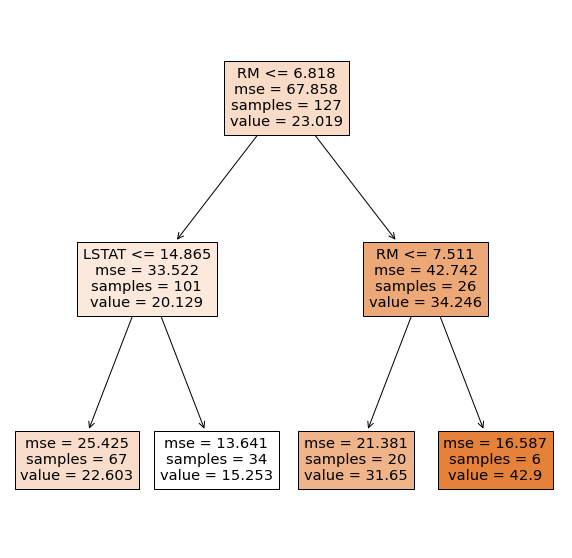

In [19]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [8]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.39972217e-15, 1.31926121e-05, 1.18733509e-04,
        2.11081794e-04, 3.29815303e-04, 3.29815303e-04, 3.29815303e-04,
        5.32102023e-04, 6.46437995e-04, 7.43183817e-04, 8.44327177e-04,
        8.61917326e-04, 1.31926121e-03, 1.31926121e-03, 1.59630607e-03,
        1.93931398e-03, 1.94283201e-03, 2.54177661e-03, 2.58575198e-03,
        2.58575198e-03, 2.96833773e-03, 3.37730871e-03, 3.44766931e-03,
        3.74010554e-03, 4.76253298e-03, 5.57387863e-03, 6.05892700e-03,
        6.35004398e-03, 7.14379947e-03, 7.39226033e-03, 7.44415128e-03,
        9.04636261e-03, 9.69656992e-03, 1.43667546e-02, 1.48636763e-02,
        1.59630607e-02, 1.61609499e-02, 1.74854881e-02, 1.80123131e-02,
        1.82438120e-02, 1.85795954e-02, 1.90501319e-02, 1.90501319e-02,
        2.11081794e-02, 2.11081794e-02, 2.17733069e-02, 2.20903694e-02,
        2.43500021e-02, 2.64127089e-02, 2.80512627e-02, 3.83189471e-02,
        4.02249026e-02, 4.84828496e-02, 5.56300046

Text(0, 0.5, 'Impureza total das folhas')

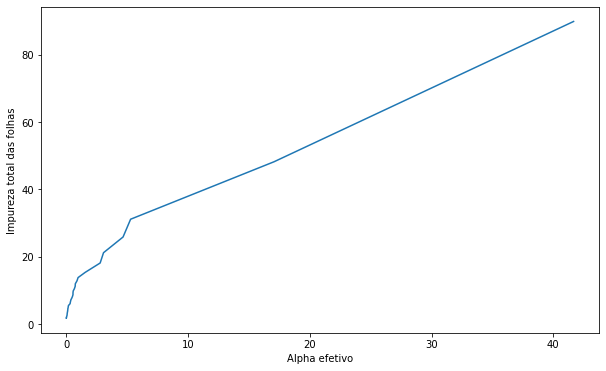

In [9]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas')

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

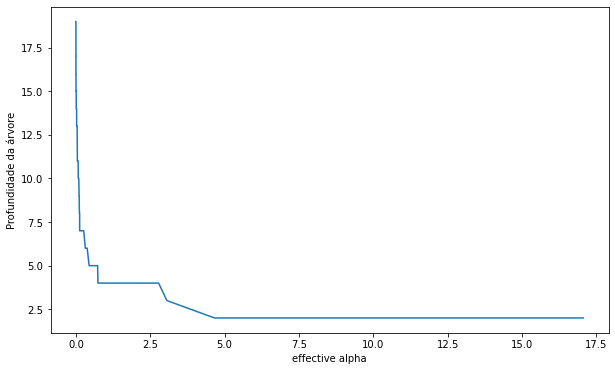

In [11]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [13]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

train_scores, test_scores

([0.0,
  0.0,
  0.00023746701846965625,
  0.003770888302550567,
  0.0063352808141726264,
  0.010297461992712637,
  0.010627277296142717,
  0.010957092599572796,
  0.018189942203794437,
  0.022266459354190214,
  0.024257224525694163,
  0.026636763412488995,
  0.029171503957783628,
  0.04825901495162707,
  0.05089753737906771,
  0.057941072999120484,
  0.0808587134062068,
  0.08279802739037566,
  0.105505517862378,
  0.10809126984126982,
  0.11067702182016163,
  0.12463253530403925,
  0.1406759243395127,
  0.14750090235182584,
  0.15119703251893227,
  0.2028367066823531,
  0.2394974452401893,
  0.2569006994178498,
  0.2569006994178498,
  0.297843091678184,
  0.3195625287933995,
  0.3195625287933995,
  0.3435629685471374,
  0.399513171671483,
  0.5363736650332956,
  0.5801267433094609,
  0.5957793378565146,
  0.6117423985425304,
  0.6614185932068518,
  0.6969163944381621,
  0.6969163944381621,
  0.7337398019014114,
  0.7337398019014114,
  0.7527899338275328,
  0.8531453976249492,
  0.8742

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

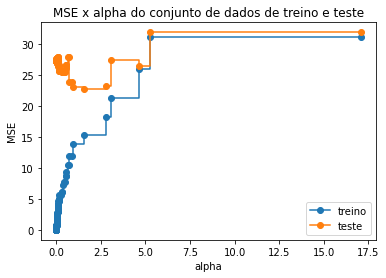

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [15]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=0.22)
arvore_final.fit(X_test, y_test)

print(f'R-Quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}')

R-Quadrado na base de testes: 0.95


### 7. Visualize esta árvore.

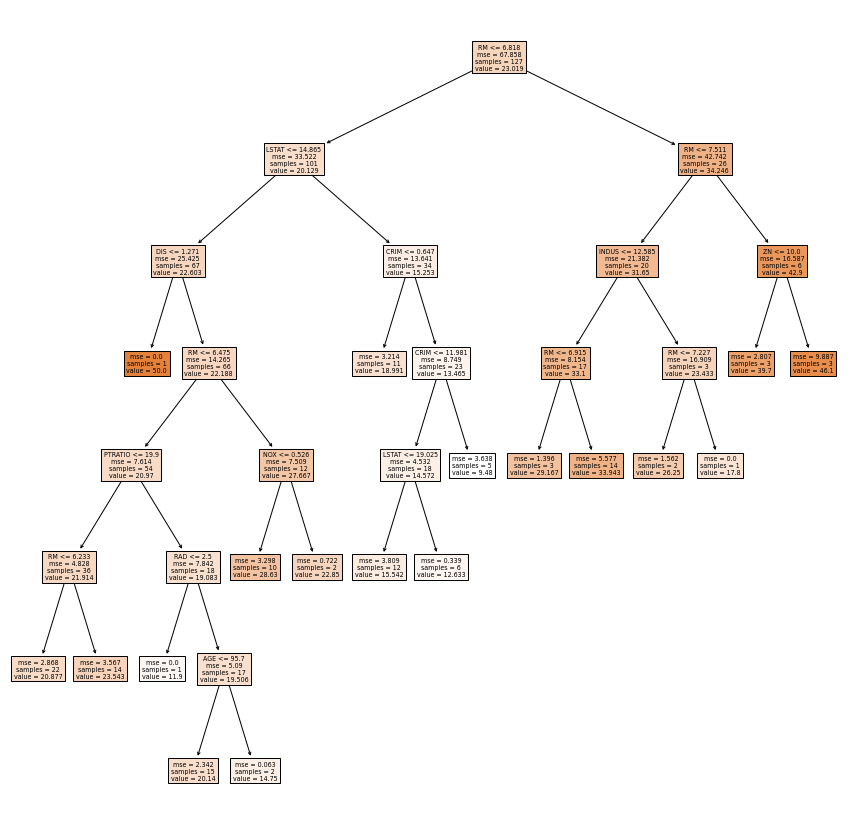

In [16]:
plt.rc('figure', figsize=(15, 15))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 